<a href="https://colab.research.google.com/github/pnijsters/pytorch/blob/main/Patrick's_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The math behind machine learning

## Single variate linear regression

$
  \begin{align}
    f_{(w,b)}(x) &= wx + b\\
    w &= weight\\
    b &= bias
  \end{align}
$

## Cost function

$
  \begin{align}
    J(w,b) &= \frac{1}{2m} \sum_{i=1}^{m} \hat(y^{(i)}-y^{(i)})^2\\
    J(w,b) &= \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)})-y^{(i)})^2\\
    J(w,b) &= \frac{1}{2m} \sum_{i=1}^{m} (wx^{(i)} + b - y^{(i)})^2
  \end{align}
$

## Gradient descent
**TODO!**  
Figure out the derivatice chain rule since that makes that the derivative for 'w' needs to multiply by 'x' whereas this is not the case for 'b'.
$
  \begin{align}
    w &= w -α \frac {\partial }{\partial w}J(w,b)\\
     &= w -α \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)})-y^{(i)}) x^{(i)}\\
    \\
    b &= b -α \frac {\partial}{\partial b}J(w,b)\\
    &= b -α \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)})-y^{(i)})\\
    \\
    & \min_{w,b} J(w,b)
  \end{align}
$

# Patrick's Attempt at Gradient Descent in Python

## Imports and data-set loading from Google Drive

The data set is Medical Costs from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

Columns in this set (header row has been removed!):
- [0] age
- [1] sex
- [2] bmi
- [3] children
- [4] smoker
- [5] region
- [6] charges

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import csv
from google.colab import drive
drive.mount('/content/drive')

feature_one=np.array([])
target=np.array([])

with open("/content/drive/My Drive/Sample-data/insurance.csv", newline='') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',')
    for row in filereader:
      feature_one = np.append(feature_one, float(row[2]))
      target=np.append(target, float(row[6]))

Mounted at /content/drive


In [2]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost


In [3]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

Start alpha: 0.001
Start bias: 0
Start weight: 0
Iteration   20 - Cost: 7.22e+07, Cost change: 5.72e-03  dj_dw: -5.960e+04, dj_db: -1.915e+03   w:  3.759e+02, b: 1.18833e+01
Iteration   40 - Cost: 7.04e+07, Cost change: 9.60e-05  dj_dw: -7.601e+03, dj_db: -2.833e+02   w:  4.239e+02, b: 1.34773e+01
Iteration   60 - Cost: 7.04e+07, Cost change: 1.57e-06  dj_dw: -9.684e+02, dj_db: -7.521e+01   w:  4.300e+02, b: 1.37588e+01
Iteration   80 - Cost: 7.04e+07, Cost change: 2.83e-08  dj_dw: -1.223e+02, dj_db: -4.866e+01   w:  4.308e+02, b: 1.38728e+01
Iteration  100 - Cost: 7.04e+07, Cost change: 3.26e-09  dj_dw: -1.437e+01, dj_db: -4.527e+01   w:  4.308e+02, b: 1.39655e+01
Iteration  120 - Cost: 7.04e+07, Cost change: 2.86e-09  dj_dw: -6.080e-01, dj_db: -4.484e+01   w:  4.309e+02, b: 1.40555e+01
Iteration  140 - Cost: 7.04e+07, Cost change: 2.85e-09  dj_dw:  1.148e+00, dj_db: -4.478e+01   w:  4.309e+02, b: 1.41451e+01
Iteration  160 - Cost: 7.04e+07, Cost change: 2.85e-09  dj_dw:  1.372e+00, d

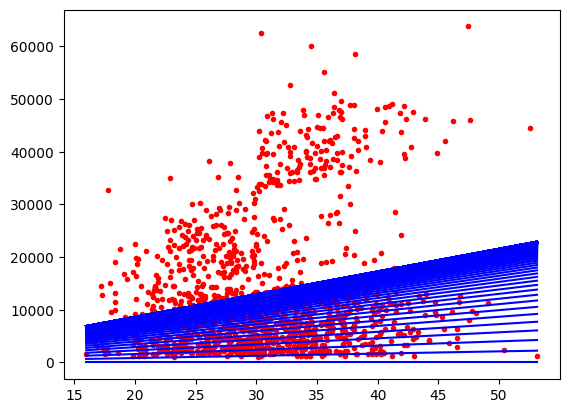

In [4]:
# start with some random values
bias=random.uniform(-1, 1)      # no need to do random, zero is random as well...
weight=random.uniform(-1, 1)    # same thing, could just start with zero
bias=0
weight=0
alpha=0.001
max_iterations=200
cost=1
print(f"Start alpha: {alpha}")
print(f"Start bias: {bias}")
print(f"Start weight: {weight}")

plt.scatter(feature_one,target,c='r', marker='.')

iteration=0
while (iteration<max_iterations and cost>0):
  # calculate the output and plot
  y_hat=weight * feature_one + bias
  line_x=np.array([np.min(feature_one), np.max(feature_one)])
  line_y=np.array([y_hat[np.argmin(feature_one)],y_hat[np.argmax(feature_one)]])
  plt.plot(line_x,line_y,c='b')

  cost_new=compute_cost(feature_one, target, weight, bias)
  if cost_new>cost: # we're diverging because alpha is too large
    alpha=alpha/10

  percent=(cost-cost_new)/cost
  cost=cost_new

  # calculate new weight and bias
  dw,db = compute_gradient(feature_one, target, weight, bias)
  weight=weight - alpha * dw
  bias=bias - alpha * db
  iteration+=1

  if iteration% math.ceil(max_iterations/10) == 0:
    print(f"Iteration {iteration:4} - Cost: {cost_new:0.2e}, Cost change: {percent:0.2e} ",f"dj_dw: {dw: 0.3e}, dj_db: {db: 0.3e}  ",f"w: {weight: 0.3e}, b:{bias: 0.5e}")


print(f"\nNumber of iterations: {iteration}")
print(f"Final cost: {cost}")
print(f"Final alpha: {alpha}")
print(f"Final bias: {bias}")
print(f"Final weight: {weight}")

# Vectorization



## Dot product definition
The dot product multiplies the values in two vectors element-wise and then sums the result.

$
  \begin{align}
    \vec a \cdot \vec b &= \sum_{i=1}^n a_ib_i = \begin{bmatrix} a_1 \\ a_2\\ \vdots\\ a_n \end{bmatrix} \cdot \begin{bmatrix} b_1 \\ b_2\\ \vdots\\ b_n \end{bmatrix} = a_1b_1 + a_2b_2 + \dots + a_nb_n
  \end{align}
$


## Multiple variable linear regression

$
  \begin{align}
    f_{(w,b)}(x) &= w_1x_1 + w_2x_2 + ... + w_nx_n + b\\
    \\
    \vec x &= [ x_1, x_2, ..., x_n]\\
    \vec w &= [ w_1, w_2, ..., w_n]\\
    \\
    f_{\vec w,b}(\vec x) &= \vec w \cdot \vec x +b
  \end{align}
$

## Multivariate gradient descent

### Cost function

$
  \begin{align}
  J(\vec w,b) &= \frac{1}{2m} \sum_{i=1}^{m} \hat(y^{(i)}-y^{(i)})^2\\
  J(\vec w,b) &= \frac{1}{2m} \sum_{i=1}^{m} (f_{\vec w,b}(x^{(i)})-y^{(i)})^2\\
  J(\vec w,b) &= \frac{1}{2m} \sum_{i=1}^{m} (\vec wx^{(i)} + b - y^{(i)})^2\\
  \end{align}
$


### Gradient descent function

$
  \begin{align}
  \vec w &= \vec w -α \frac {\partial }{\partial \vec w}J(\vec w,b)\\
  w_n &= w_n - α \frac{1}{m} \sum_{i=1}^{m} (f_{\vec w,b}(\vec x^{(i)} - y^{(i)}) x_n^{(i)}\\
  b &= b -α \frac {\partial}{\partial b}J(\vec w,b)\\
  b &= b - α \frac{1}{m} \sum_{i=1}^{m} (f_{\vec w,b}(\vec x^{(i)} - y^{(i)}) \\
  & \min_{\vec w,b} J(\vec w,b)
  \end{align}
$